# Import Libraries

In [32]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


# Data Importing

In [33]:
base_path = os.getcwd()
print(base_path)


C:\Users\SebyG\Documents\GitHub\Zeo-CO2-H2S


In [41]:
os.chdir(base_path)
## selectivities ##
sel_da = pd.read_csv('Selectivity_GCMC.csv')
sel_CO2 = sel_da['CO2_CH4'].to_numpy()
sel_H2S = sel_da['H2S_CH4'].to_numpy()
## PSA performances ##
psa_c = pd.read_csv("PSA_result_CO2.csv")
psa_c_r = psa_c['Recovery_max'].to_numpy()
psa_c_x = psa_c['CO2 purity'].to_numpy()
psa_c_ind = psa_c['Is_CH4_raffinate'].to_numpy()

psa_h = pd.read_csv("PSA_result_H2S.csv")
psa_h_r = psa_h['Recovery_max'].to_numpy()
psa_h_x = psa_h['H2S purity'].to_numpy()
psa_h_ind = psa_h['Is_CH4_raffinate'].to_numpy()

# SRCC for CO2 and H2S Case
Spearman Rank Correlation Coefficient

In [35]:
import scipy.stats as stats

## SRCC for CO2 case

In [44]:
SRCC_CO2_r, _  = stats.spearmanr(sel_CO2[psa_c_ind>0.5], psa_c_r[psa_c_ind>0.5])
SRCC_CO2_x, _  = stats.spearmanr(sel_CO2[psa_c_ind<0.5], psa_c_x[psa_c_ind<0.5])
print('SRCC with recovery:', SRCC_CO2_r)
print('SRCC with purity :', SRCC_CO2_x)



SRCC with recovery: -0.042490118577075096
SRCC with purity : -0.8688882621444205


## SRCC for H2S case

In [45]:
SRCC_H2S_r, _  = stats.spearmanr(sel_H2S, psa_h_r)
SRCC_H2S_x, _  = stats.spearmanr(sel_H2S, psa_h_x)
print('SRCC with recovery:', SRCC_H2S_r)
print('SRCC with purity :', SRCC_H2S_x)


SRCC_H2S_r, _  = stats.spearmanr(sel_H2S[psa_h_ind>0.5], psa_h_r[psa_h_ind>0.5])
SRCC_H2S_x, _  = stats.spearmanr(sel_H2S[psa_h_ind<0.5], psa_h_x[psa_h_ind<0.5])
print('SRCC with recovery:', SRCC_H2S_r)
print('SRCC with purity :', SRCC_H2S_x)


SRCC with recovery: 0.2697851005987497
SRCC with purity : -0.3922689053419981
SRCC with recovery: 0.16483516483516483
SRCC with purity : -0.3388950810668816


# Scatter Plot

## CO2 case

Text(1.3, 42, 'SRCC$_2$ = -0.042')

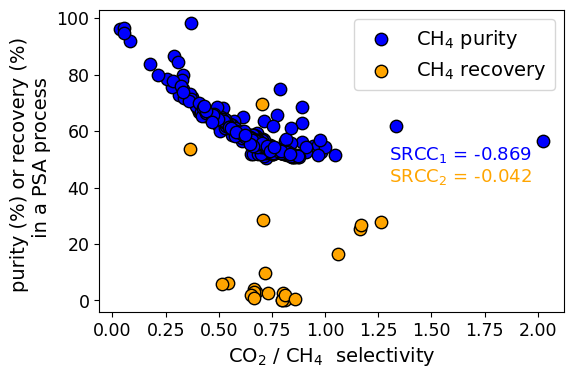

In [46]:
####  50 bar, 343 K, 50% CO2 Case ###
plt.figure(
    dpi=100
)
plt.scatter(sel_CO2,psa_c_x*100, label = 'CH$_4$ purity',
           s = 80, c = 'blue',edgecolors='k')
plt.scatter(sel_CO2,psa_c_r*100, label = 'CH$_4$ recovery',
           s = 80, c = 'orange',edgecolors='k')



plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5)
plt.xlabel('CO$_2$ / CH$_4$  selectivity', fontsize = 14)
plt.ylabel('purity (%) or recovery (%) \n in a PSA process', fontsize = 14)

plt.ylim([-4,103])
plt.legend(fontsize = 14)

plt.text(1.30,50, 'SRCC$_1$ = {0:.3f}'.format(SRCC_CO2_x),
fontdict = {'color':'blue','size': 13})
plt.text(1.30,50-8, 'SRCC$_2$ = {0:.3f}'.format(SRCC_CO2_r), 
fontdict = {'color':'orange','size':13})

## H2S Case

Text(0.3, 27, 'SRCC$_2$ = 0.165')

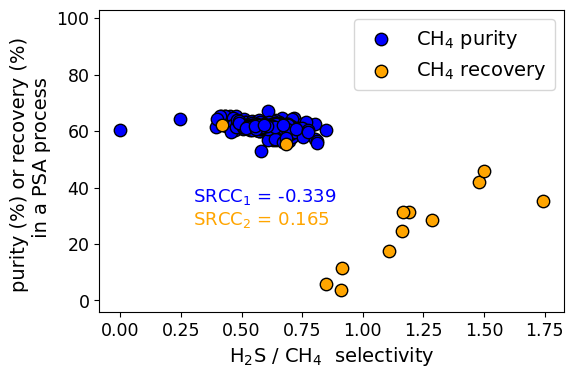

In [47]:
####  50 bar, 343 K, 50% H2S Case ###
plt.figure(
    dpi=100
)
plt.scatter(sel_H2S,psa_h_x*100, label = 'CH$_4$ purity',
           s = 80, c = 'blue',edgecolors='k')
plt.scatter(sel_H2S,psa_h_r*100, label = 'CH$_4$ recovery',
           s = 80, c = 'orange',edgecolors='k')


plt.xticks(fontsize = 12.5)
plt.yticks(fontsize = 12.5)
plt.xlabel('H$_2$S / CH$_4$  selectivity', fontsize = 14)
plt.ylabel('purity (%) or recovery (%) \n in a PSA process', fontsize = 14)

plt.ylim([-4,103])
plt.legend(fontsize = 14)

plt.text(0.30,35, 'SRCC$_1$ = {0:.3f}'.format(SRCC_H2S_x),
fontdict = {'color':'blue','size': 13})
plt.text(0.30,35-8, 'SRCC$_2$ = {0:.3f}'.format(SRCC_H2S_r), 
fontdict = {'color':'orange','size':13})